In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
df=pd.read_csv("mpii_dataset.csv")

In [3]:
df=df[:3000]
print(df.shape)

(3000, 37)


In [4]:
img=Image.open('../MPII/000003072.jpg')
imsize=np.array(img.size)
fact=imsize/224.0
print(fact)

[5.71428571 3.21428571]


In [5]:
def pix1(ix):
    img = df['NAME'][ix]
    print(img)
    

    im = Image.open('../MPII/'+img )
    #implot=plt.imshow(im)
    #plt.show()
    im2=im.resize((224,224))
    implot = plt.imshow(im2)
    imsize=np.array(im.size)
    fact=imsize/224.0
    print(fact)
    
    px=2
    kx=ix
    while px <34:
        col = df.columns[px]
        x = df[col][ix]
        col = df.columns[px+1]
        y = df[col][ix]
        print(col,x,y)
        #plt.scatter([[x]],[[y]])
        px=px+2
    cx=2
    while cx<34:
        col=df.columns[cx]
        x=df[col][kx]/fact[0]
        col=df.columns[cx+1]
        y=df[col][kx]/fact[1]
        print(col,x,y)
        plt.scatter([[x]],[[y]])
        cx+=2
    plt.show()
    

018182497.jpg
[2.85714286 2.14285714]
('r ankle_Y', 325, 349)
('r knee_Y', 341, 327)
('r hip_Y', 326, 302)
('l hip_Y', 385, 277)
('l knee_Y', 409, 302)
('l ankle_Y', 399, 377)
('pelvis_Y', 356, 290)
('thorax_Y', 314, 209)
('upper neck_Y', 315.2436, 213.9744)
('head top_Y', 286.7564, 100.0256)
('r wrist_Y', 318, 325)
('r elbow_Y', 280, 288)
('r shoulder_Y', 267, 231)
('l shoulder_Y', 360, 187)
('l elbow_Y', 406, 218)
('l wrist_Y', 374, 258)
('r ankle_Y', 113.75, 162.86666666666667)
('r knee_Y', 119.35, 152.6)
('r hip_Y', 114.1, 140.93333333333334)
('l hip_Y', 134.75, 129.26666666666668)
('l knee_Y', 143.15, 140.93333333333334)
('l ankle_Y', 139.65, 175.93333333333334)
('pelvis_Y', 124.6, 135.33333333333334)
('thorax_Y', 109.89999999999999, 97.53333333333333)
('upper neck_Y', 110.33526, 99.85472)
('head top_Y', 100.36474, 46.67861333333333)
('r wrist_Y', 111.3, 151.66666666666666)
('r elbow_Y', 98.0, 134.4)
('r shoulder_Y', 93.45, 107.8)
('l shoulder_Y', 126.0, 87.26666666666667)
('l elb

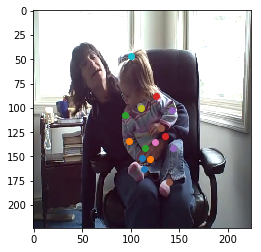

In [6]:
pix1(8)

In [7]:
import os
import cv2
import h5py
import keras
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

Using TensorFlow backend.
/usr/local/lib/python2.7/dist-packages/requests/__init__.py:83: RequestsDependencyWarning: Old version of cryptography ([1, 2, 3]) may cause slowdown.
  warnings.warn(warning, RequestsDependencyWarning)


In [8]:
from PIL import Image
from pathlib import Path
from keras.models import Sequential,Model
from keras.applications.xception import Xception
from keras.applications.resnet50 import ResNet50
from keras.applications.vgg16 import VGG16,preprocess_input

In [9]:
from keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array

In [10]:
from keras.layers import Convolution2D,MaxPooling2D,Dense,Dropout,Input,Flatten,SeparableConv2D,GlobalAveragePooling2D

In [11]:
from keras.layers import GlobalMaxPool2D
from keras import backend as K
from keras.optimizers import Adam,SGD,RMSprop
from keras.callbacks import ModelCheckpoint,Callback,EarlyStopping,TensorBoard,ReduceLROnPlateau,CSVLogger,LearningRateScheduler

In [12]:
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
color=sns.color_palette()
%matplotlib inline

In [13]:
def step_decay(epoch):
    initial_rate=0.1
    drop=0.5
    epochs_drop=5.0
    lrate=intia_rate*math.pow(drop,math.floor((1+epoch)/epochs_drop))
    return lrate

In [14]:
def show_final_history(history):
    fig,ax=plt.subplots(1,2,figsize=(15,5))
    ax[0].set_title('loss')
    ax[0].plot(history.epoch,history.history['loss'],label="Train Losss")
    ax[0].plot(history.epoch,history.history["val_loss"],label="Validation_loss")
    ax[1].set_title('mse')
    ax[1].plot(history.epoch,history.history["mean_absolute_error"],label="Train_acc")
    ax[1].plot(history.epoch,history.history["val_mean_absolute_error"],label="validaton_loss")
    ax[0].legend()
    ax[1].legend()

In [15]:
train_data='../MPII/'

In [16]:
data=pd.read_csv('mpii_dataset.csv')
data=data[:3000]
print(type(data['NAME'].values))

image_data=[]
labels=[]

print(data.shape[0])
print(data['NAME'].shape)
data.head()

<type 'numpy.ndarray'>
3000
(3000,)


,Unnamed: 0,NAME,r ankle_X,r ankle_Y,r knee_X,r knee_Y,r hip_X,r hip_Y,l hip_X,l hip_Y,...,r shoulder_Y,l shoulder_X,l shoulder_Y,l elbow_X,l elbow_Y,l wrist_X,l wrist_Y,Scale,Activity,Category
0,0,015601864.jpg,620,394,616,269,573,185,647,188,...,167,692,185,693,240,688,313,3.021046,curling,sports
1,0,015599452.jpg,-1,-1,-1,-1,806,543,720,593,...,281,719,299,711,516,545,466,5.641276,curling,sports
2,0,005808361.jpg,804,711,816,510,908,438,1040,454,...,253,1067,253,1167,353,1142,478,4.718488,curling,sports
3,0,086617615.jpg,301,461,305,375,201,340,294,342,...,261,314,264,327,320,362,346,2.681349,curling,sports
4,0,060111501.jpg,980,322,896,318,865,248,943,226,...,147,923,123,995,163,961,223,3.806403,curling,sports


In [ ]:
for img_path in data['NAME'].values:
    img=load_img('../MPII/'+img_path,target_size=(224,224))
    img_array=img_to_array(img)
    image_data.append(img_array)


In [ ]:
print(len(image_data))
image_data2=np.asarray(image_data)
print(image_data2.shape)

In [23]:
y_train=data[data.columns[2:-3]]
print(y_train.columns)
print(y_train.shape)

y_train2=np.ones((y_train.shape))
print(y_train.shape)
for ix in range(data.shape[0]):
    img=df['NAME'][ix]
    print(img)
    print(ix)
    im = Image.open('../MPII/'+img )
    #implot=plt.imshow(im)
    #plt.show()
    im2=im.resize((224,224))
    #implot = plt.imshow(im2)
    imsize=np.array(im.size)
    fact=imsize/224.0
    print(fact)
    cx=2
    while cx<34:
        col=df.columns[cx]
        x=df[col][ix]/fact[0]
        col=df.columns[cx+1]
        y=df[col][ix]/fact[1]
        #print(col,x,y)
        y_train2[ix][cx-2]=x
        y_train2[ix][cx-1]=y
        cx+=2
    

Index([u'r ankle_X', u'r ankle_Y', u'r knee_X', u'r knee_Y', u'r hip_X',
       u'r hip_Y', u'l hip_X', u'l hip_Y', u'l knee_X', u'l knee_Y',
       u'l ankle_X', u'l ankle_Y', u'pelvis_X', u'pelvis_Y', u'thorax_X',
       u'thorax_Y', u'upper neck_X', u'upper neck_Y', u'head top_X',
       u'head top_Y', u'r wrist_X', u'r wrist_Y', u'r elbow_X', u'r elbow_Y',
       u'r shoulder_X', u'r shoulder_Y', u'l shoulder_X', u'l shoulder_Y',
       u'l elbow_X', u'l elbow_Y', u'l wrist_X', u'l wrist_Y'],
      dtype='object')
(3000, 32)
(3000, 32)
015601864.jpg
0
[5.71428571 3.21428571]
015599452.jpg
1
[5.71428571 3.21428571]
005808361.jpg
2
[5.71428571 3.21428571]
086617615.jpg
3
[5.71428571 3.21428571]
060111501.jpg
4
[5.71428571 3.21428571]
070807258.jpg
5
[5.71428571 3.21428571]
002058449.jpg
6
[5.71428571 3.21428571]
021233911.jpg
7
[2.85714286 2.14285714]
018182497.jpg
8
[2.85714286 2.14285714]
018340451.jpg
9
[3.8125     2.14285714]
030424224.jpg
10
[3.8125     2.14285714]
052475643.jpg

[2.85714286 2.14285714]
014008402.jpg
189
[2.85714286 2.14285714]
051832965.jpg
190
[2.85714286 2.14285714]
087737307.jpg
191
[2.85714286 2.14285714]
074076862.jpg
192
[3.8125     2.14285714]
069701574.jpg
193
[3.8125     2.14285714]
070248408.jpg
194
[8.57142857 4.82142857]
035949115.jpg
195
[8.57142857 4.82142857]
029359184.jpg
196
[8.57142857 4.82142857]
080936116.jpg
197
[5.71428571 3.21428571]
081011339.jpg
198
[5.71428571 3.21428571]
086707232.jpg
199
[5.71428571 3.21428571]
091324055.jpg
200
[5.71428571 3.21428571]
051134240.jpg
201
[5.71428571 3.21428571]
050151629.jpg
202
[8.57142857 4.82142857]
079829518.jpg
203
[8.57142857 4.82142857]
070196688.jpg
204
[3.8125     2.14285714]
079579267.jpg
205
[3.8125     2.14285714]
057828014.jpg
206
[5.71428571 3.21428571]
046559802.jpg
207
[5.71428571 3.21428571]
054264463.jpg
208
[5.71428571 3.21428571]
028654125.jpg
209
[5.71428571 3.21428571]
059083326.jpg
210
[5.71428571 3.21428571]
003050025.jpg
211
[2.85714286 2.14285714]
003734819.

[3.78571429 2.14285714]
085218150.jpg
387
[3.78571429 2.14285714]
055190684.jpg
388
[3.78571429 2.14285714]
056093797.jpg
389
[3.8125     2.14285714]
087665360.jpg
390
[3.8125     2.14285714]
075513726.jpg
391
[5.71428571 3.21428571]
062030955.jpg
392
[5.71428571 3.21428571]
021296416.jpg
393
[5.71428571 3.21428571]
013637148.jpg
394
[5.71428571 3.21428571]
001454467.jpg
395
[2.85714286 2.14285714]
058991769.jpg
396
[8.57142857 4.82142857]
039224405.jpg
397
[8.57142857 4.82142857]
043747492.jpg
398
[8.57142857 4.82142857]
051398949.jpg
399
[5.71428571 3.21428571]
078365301.jpg
400
[5.71428571 3.21428571]
062208670.jpg
401
[5.71428571 3.21428571]
086236371.jpg
402
[5.71428571 3.21428571]
094952062.jpg
403
[3.78571429 2.14285714]
014707348.jpg
404
[3.78571429 2.14285714]
025824439.jpg
405
[2.85714286 2.14285714]
045913576.jpg
406
[2.85714286 2.14285714]
007586333.jpg
407
[8.57142857 4.82142857]
012804584.jpg
408
[8.57142857 4.82142857]
015190269.jpg
409
[5.71428571 3.21428571]
013882717.

[8.57142857 4.82142857]
067189274.jpg
583
[8.57142857 4.82142857]
001971054.jpg
584
[8.57142857 4.82142857]
010410858.jpg
585
[8.57142857 4.82142857]
079991609.jpg
586
[8.57142857 4.82142857]
017854466.jpg
587
[8.57142857 4.82142857]
065274611.jpg
588
[8.57142857 4.82142857]
023818278.jpg
589
[8.57142857 4.82142857]
009944139.jpg
590
[8.57142857 4.82142857]
024317219.jpg
591
[8.57142857 4.82142857]
072226693.jpg
592
[8.57142857 4.82142857]
085569647.jpg
593
[8.57142857 4.82142857]
083021986.jpg
594
[8.57142857 4.82142857]
039718353.jpg
595
[8.57142857 4.82142857]
066808514.jpg
596
[8.57142857 4.82142857]
020498430.jpg
597
[8.57142857 4.82142857]
029314773.jpg
598
[8.57142857 4.82142857]
089633582.jpg
599
[8.57142857 4.82142857]
001300192.jpg
600
[5.71428571 3.21428571]
008550853.jpg
601
[5.71428571 3.21428571]
081744356.jpg
602
[3.8125     2.14285714]
025942343.jpg
603
[3.8125     2.14285714]
037969241.jpg
604
[3.8125     2.14285714]
059029494.jpg
605
[3.8125     2.14285714]
026806364.

[8.57142857 4.82142857]
083701333.jpg
780
[8.57142857 4.82142857]
069747146.jpg
781
[8.57142857 4.82142857]
068014077.jpg
782
[3.21428571 2.14285714]
061861138.jpg
783
[3.21428571 2.14285714]
075271664.jpg
784
[3.8125     2.13392857]
015860511.jpg
785
[3.8125     2.13392857]
088087076.jpg
786
[3.8125     2.13392857]
087184353.jpg
787
[5.71428571 3.21428571]
002924728.jpg
788
[5.71428571 3.21428571]
082581675.jpg
789
[5.71428571 3.21428571]
012886987.jpg
790
[5.71428571 3.21428571]
033511885.jpg
791
[5.71428571 3.21428571]
074350826.jpg
792
[5.71428571 3.21428571]
016075990.jpg
793
[5.71428571 3.21428571]
081796702.jpg
794
[5.71428571 3.21428571]
083213418.jpg
795
[5.71428571 3.21428571]
050746773.jpg
796
[5.71428571 3.21428571]
000638587.jpg
797
[5.71428571 3.21428571]
028703813.jpg
798
[5.71428571 3.21428571]
061692692.jpg
799
[5.71428571 3.21428571]
098118618.jpg
800
[5.71428571 3.21428571]
063181353.jpg
801
[5.71428571 3.21428571]
025980358.jpg
802
[5.71428571 3.21428571]
063400570.

[3.8125     2.14285714]
086791829.jpg
977
[1.60714286 2.14285714]
045473986.jpg
978
[1.60714286 2.14285714]
051559603.jpg
979
[3.80357143 2.14285714]
048884658.jpg
980
[3.80357143 2.14285714]
066686426.jpg
981
[3.80357143 2.14285714]
013965125.jpg
982
[5.71428571 3.21428571]
002997359.jpg
983
[5.71428571 3.21428571]
030792994.jpg
984
[8.57142857 4.82142857]
070468076.jpg
985
[8.57142857 4.82142857]
020185345.jpg
986
[2.85714286 2.14285714]
044375022.jpg
987
[2.67857143 2.14285714]
086814225.jpg
988
[2.67857143 2.14285714]
017714979.jpg
989
[2.67857143 2.14285714]
069262595.jpg
990
[4.28571429 3.21428571]
083811529.jpg
991
[4.28571429 3.21428571]
094461422.jpg
992
[4.28571429 3.21428571]
068324803.jpg
993
[4.28571429 3.21428571]
049717476.jpg
994
[4.28571429 3.21428571]
061784724.jpg
995
[4.28571429 3.21428571]
086890498.jpg
996
[4.28571429 3.21428571]
057060975.jpg
997
[4.28571429 3.21428571]
003038706.jpg
998
[4.28571429 3.21428571]
021567515.jpg
999
[2.85714286 2.14285714]
065888547.

[2.85714286 2.14285714]
021603818.jpg
1172
[2.85714286 2.14285714]
061958795.jpg
1173
[2.85714286 2.14285714]
065020109.jpg
1174
[2.85714286 2.14285714]
015202485.jpg
1175
[8.57142857 4.82142857]
023918010.jpg
1176
[2.85714286 2.14285714]
014224937.jpg
1177
[5.71428571 3.21428571]
012138494.jpg
1178
[5.71428571 3.21428571]
030327515.jpg
1179
[5.71428571 3.21428571]
010104581.jpg
1180
[5.71428571 3.21428571]
069216134.jpg
1181
[2.85714286 2.14285714]
006229180.jpg
1182
[2.85714286 2.14285714]
050942213.jpg
1183
[3.21428571 2.14285714]
099669685.jpg
1184
[3.21428571 2.14285714]
030625362.jpg
1185
[5.71428571 3.19642857]
062389584.jpg
1186
[2.85714286 2.14285714]
019462251.jpg
1187
[3.21428571 2.14285714]
036775935.jpg
1188
[5.71428571 3.21428571]
076028982.jpg
1189
[5.71428571 3.21428571]
013710971.jpg
1190
[5.71428571 3.21428571]
053531013.jpg
1191
[5.71428571 3.21428571]
021520187.jpg
1192
[2.85714286 2.14285714]
001212077.jpg
1193
[2.85714286 2.14285714]
024120146.jpg
1194
[2.85714286

[5.71428571 3.21428571]
044973984.jpg
1363
[5.71428571 3.21428571]
077671056.jpg
1364
[5.71428571 3.21428571]
006536616.jpg
1365
[5.71428571 3.21428571]
048757119.jpg
1366
[5.71428571 3.21428571]
003361360.jpg
1367
[5.71428571 3.21428571]
006265320.jpg
1368
[5.71428571 3.21428571]
090643745.jpg
1369
[5.71428571 3.21428571]
013924537.jpg
1370
[5.71428571 3.21428571]
053242068.jpg
1371
[5.71428571 3.21428571]
041109560.jpg
1372
[2.85714286 2.14285714]
034734333.jpg
1373
[2.85714286 2.14285714]
089983335.jpg
1374
[2.85714286 2.14285714]
002182340.jpg
1375
[2.85714286 2.14285714]
066378969.jpg
1376
[2.85714286 2.14285714]
056016818.jpg
1377
[2.85714286 2.14285714]
093682246.jpg
1378
[2.85714286 2.14285714]
005225788.jpg
1379
[8.57142857 4.82142857]
041879332.jpg
1380
[8.57142857 4.82142857]
026015779.jpg
1381
[8.57142857 4.82142857]
073082096.jpg
1382
[8.57142857 4.82142857]
098129709.jpg
1383
[8.57142857 4.82142857]
025653006.jpg
1384
[8.57142857 4.82142857]
065417460.jpg
1385
[8.57142857

[2.85714286 2.14285714]
001013118.jpg
1558
[2.85714286 2.14285714]
063609605.jpg
1559
[5.71428571 3.21428571]
091328695.jpg
1560
[5.71428571 3.21428571]
061257347.jpg
1561
[5.71428571 3.21428571]
087369859.jpg
1562
[5.71428571 3.21428571]
072397306.jpg
1563
[5.71428571 3.21428571]
012055842.jpg
1564
[5.71428571 3.21428571]
090245331.jpg
1565
[5.71428571 3.21428571]
006644384.jpg
1566
[2.67857143 2.14285714]
053396747.jpg
1567
[2.67857143 2.14285714]
014213712.jpg
1568
[2.67857143 2.14285714]
001170661.jpg
1569
[2.67857143 2.14285714]
085756234.jpg
1570
[3.21428571 2.14285714]
091663524.jpg
1571
[3.21428571 2.14285714]
043098522.jpg
1572
[3.21428571 2.14285714]
031886682.jpg
1573
[3.21428571 2.14285714]
058219875.jpg
1574
[3.21428571 2.14285714]
037117242.jpg
1575
[3.21428571 2.14285714]
060107417.jpg
1576
[3.21428571 2.14285714]
070558586.jpg
1577
[3.21428571 2.14285714]
068840502.jpg
1578
[3.21428571 2.14285714]
037455289.jpg
1579
[3.21428571 2.14285714]
016686020.jpg
1580
[3.21428571

[8.57142857 4.82142857]
027039329.jpg
1752
[2.85714286 2.14285714]
084271190.jpg
1753
[2.85714286 2.14285714]
031334792.jpg
1754
[2.85714286 2.14285714]
078893247.jpg
1755
[2.85714286 2.14285714]
089187214.jpg
1756
[2.85714286 2.14285714]
043381742.jpg
1757
[2.85714286 2.14285714]
090994314.jpg
1758
[2.85714286 2.14285714]
037731805.jpg
1759
[2.85714286 2.14285714]
096407842.jpg
1760
[2.85714286 2.14285714]
008928952.jpg
1761
[2.85714286 2.14285714]
068701927.jpg
1762
[2.85714286 2.14285714]
049381404.jpg
1763
[2.85714286 2.14285714]
038764881.jpg
1764
[2.85714286 2.14285714]
063271188.jpg
1765
[2.85714286 2.14285714]
070385709.jpg
1766
[2.85714286 2.14285714]
000436327.jpg
1767
[2.85714286 2.14285714]
016695309.jpg
1768
[2.85714286 2.14285714]
071304605.jpg
1769
[5.71428571 3.21428571]
066638541.jpg
1770
[5.71428571 3.21428571]
096604751.jpg
1771
[5.71428571 3.21428571]
076103779.jpg
1772
[5.71428571 3.21428571]
095077271.jpg
1773
[5.71428571 3.21428571]
070254050.jpg
1774
[5.71428571

[8.57142857 4.82142857]
041944799.jpg
1943
[8.57142857 4.82142857]
078036550.jpg
1944
[8.57142857 4.82142857]
047633573.jpg
1945
[8.57142857 4.82142857]
049753985.jpg
1946
[2.85714286 2.14285714]
020468011.jpg
1947
[2.85714286 2.14285714]
059113030.jpg
1948
[2.85714286 2.14285714]
018613590.jpg
1949
[2.85714286 2.14285714]
006900759.jpg
1950
[2.85714286 2.14285714]
081087858.jpg
1951
[5.71428571 3.21428571]
083582593.jpg
1952
[5.71428571 3.21428571]
033219103.jpg
1953
[5.71428571 3.21428571]
069361806.jpg
1954
[5.71428571 3.21428571]
077112282.jpg
1955
[5.71428571 3.21428571]
065465069.jpg
1956
[5.71428571 3.21428571]
015159507.jpg
1957
[5.71428571 3.21428571]
087588308.jpg
1958
[5.71428571 3.21428571]
053909455.jpg
1959
[5.71428571 3.21428571]
028247243.jpg
1960
[5.71428571 3.21428571]
042522819.jpg
1961
[5.71428571 3.21428571]
003757109.jpg
1962
[5.71428571 3.21428571]
012786680.jpg
1963
[5.71428571 3.21428571]
076554675.jpg
1964
[5.71428571 3.21428571]
000001163.jpg
1965
[5.71428571

[5.71428571 3.21428571]
000905416.jpg
2136
[5.71428571 3.21428571]
058945399.jpg
2137
[5.71428571 3.21428571]
061329168.jpg
2138
[5.71428571 3.21428571]
019927034.jpg
2139
[5.71428571 3.21428571]
087747005.jpg
2140
[5.71428571 3.21428571]
073872315.jpg
2141
[5.71428571 3.21428571]
001374555.jpg
2142
[5.71428571 3.21428571]
024837626.jpg
2143
[5.71428571 3.21428571]
021440648.jpg
2144
[5.71428571 3.21428571]
027080633.jpg
2145
[5.71428571 3.21428571]
095149071.jpg
2146
[2.85714286 2.14285714]
083849183.jpg
2147
[2.85714286 2.14285714]
080509032.jpg
2148
[2.85714286 2.14285714]
006845872.jpg
2149
[5.71428571 3.21428571]
037111294.jpg
2150
[5.71428571 3.21428571]
092076661.jpg
2151
[5.71428571 3.21428571]
058444891.jpg
2152
[5.71428571 3.21428571]
053833194.jpg
2153
[5.71428571 3.21428571]
026885351.jpg
2154
[5.71428571 3.21428571]
036844892.jpg
2155
[5.71428571 3.21428571]
089534609.jpg
2156
[8.57142857 4.82142857]
066646305.jpg
2157
[8.57142857 4.82142857]
078738703.jpg
2158
[8.57142857

[5.71428571 3.21428571]
088811819.jpg
2330
[5.71428571 3.21428571]
024900874.jpg
2331
[2.85714286 2.14285714]
057670240.jpg
2332
[2.85714286 2.14285714]
006725591.jpg
2333
[2.85714286 2.14285714]
009491794.jpg
2334
[2.85714286 2.14285714]
099889261.jpg
2335
[2.85714286 2.14285714]
032663925.jpg
2336
[2.85714286 2.14285714]
074818391.jpg
2337
[2.85714286 2.14285714]
080666505.jpg
2338
[2.85714286 2.14285714]
085802327.jpg
2339
[5.71428571 3.21428571]
099762830.jpg
2340
[5.71428571 3.21428571]
024149649.jpg
2341
[5.71428571 3.21428571]
004035083.jpg
2342
[5.71428571 3.21428571]
041119152.jpg
2343
[5.71428571 3.21428571]
013008067.jpg
2344
[5.71428571 3.21428571]
002242589.jpg
2345
[5.71428571 3.21428571]
036042683.jpg
2346
[3.80357143 2.14285714]
078373825.jpg
2347
[3.80357143 2.14285714]
076230262.jpg
2348
[5.71428571 3.21428571]
058693651.jpg
2349
[2.85714286 2.14285714]
058095038.jpg
2350
[2.85714286 2.14285714]
099067916.jpg
2351
[2.85714286 2.14285714]
075673017.jpg
2352
[2.85714286

[2.85714286 2.14285714]
012548630.jpg
2524
[2.85714286 2.14285714]
077277142.jpg
2525
[2.85714286 2.14285714]
023693332.jpg
2526
[2.85714286 2.14285714]
067739313.jpg
2527
[2.85714286 2.14285714]
056578155.jpg
2528
[2.85714286 2.14285714]
092914472.jpg
2529
[2.85714286 2.14285714]
038732252.jpg
2530
[2.85714286 2.14285714]
006616519.jpg
2531
[2.85714286 2.14285714]
001915549.jpg
2532
[2.85714286 2.14285714]
082685856.jpg
2533
[2.85714286 2.14285714]
052473564.jpg
2534
[2.85714286 2.14285714]
077524405.jpg
2535
[2.85714286 2.14285714]
023442560.jpg
2536
[2.85714286 2.14285714]
034508375.jpg
2537
[2.85714286 2.14285714]
003010387.jpg
2538
[2.85714286 2.14285714]
096149232.jpg
2539
[2.85714286 2.14285714]
066786791.jpg
2540
[2.85714286 2.14285714]
093320509.jpg
2541
[2.85714286 2.14285714]
026549641.jpg
2542
[2.85714286 2.14285714]
061146361.jpg
2543
[2.85714286 2.14285714]
067849997.jpg
2544
[2.85714286 2.14285714]
031754970.jpg
2545
[2.85714286 2.14285714]
084810924.jpg
2546
[2.85714286

[5.67857143 3.21428571]
078329798.jpg
2716
[5.67857143 3.21428571]
026592845.jpg
2717
[5.67857143 3.21428571]
099033230.jpg
2718
[5.67857143 3.21428571]
002576960.jpg
2719
[5.67857143 3.21428571]
068804556.jpg
2720
[3.78571429 2.14285714]
012038758.jpg
2721
[3.78571429 2.14285714]
093852978.jpg
2722
[5.67857143 3.21428571]
018118328.jpg
2723
[5.67857143 3.21428571]
062275340.jpg
2724
[5.67857143 3.21428571]
022267608.jpg
2725
[5.67857143 3.21428571]
075728298.jpg
2726
[5.71428571 3.21428571]
089796465.jpg
2727
[5.71428571 3.21428571]
097469060.jpg
2728
[2.85714286 2.14285714]
013545954.jpg
2729
[2.85714286 2.14285714]
023147521.jpg
2730
[2.85714286 2.14285714]
086840952.jpg
2731
[8.57142857 4.82142857]
092646380.jpg
2732
[8.57142857 4.82142857]
041962738.jpg
2733
[8.57142857 4.82142857]
005062247.jpg
2734
[8.57142857 4.82142857]
003939183.jpg
2735
[8.57142857 4.82142857]
057394987.jpg
2736
[8.57142857 4.82142857]
039289511.jpg
2737
[5.71428571 3.21428571]
002865243.jpg
2738
[5.71428571

[5.71428571 3.21428571]
019624572.jpg
2909
[5.71428571 3.21428571]
012554979.jpg
2910
[5.71428571 3.21428571]
008603216.jpg
2911
[8.57142857 4.82142857]
005702691.jpg
2912
[8.57142857 4.82142857]
010548343.jpg
2913
[8.57142857 4.82142857]
058558768.jpg
2914
[8.57142857 4.82142857]
054434489.jpg
2915
[8.57142857 4.82142857]
023374079.jpg
2916
[8.57142857 4.82142857]
063777414.jpg
2917
[8.57142857 4.82142857]
082006750.jpg
2918
[8.57142857 4.82142857]
004157896.jpg
2919
[8.57142857 4.82142857]
049812994.jpg
2920
[8.57142857 4.82142857]
068931041.jpg
2921
[8.57142857 4.82142857]
025231193.jpg
2922
[8.57142857 4.82142857]
030777091.jpg
2923
[8.57142857 4.82142857]
061363790.jpg
2924
[8.57142857 4.82142857]
089793529.jpg
2925
[8.57142857 4.82142857]
080992442.jpg
2926
[8.57142857 4.82142857]
058313022.jpg
2927
[8.57142857 4.82142857]
073022172.jpg
2928
[8.57142857 4.82142857]
036482247.jpg
2929
[8.57142857 4.82142857]
064096553.jpg
2930
[8.57142857 4.82142857]
046618159.jpg
2931
[8.57142857

In [24]:
# y_train2=(y_train2-48)/48
y_train2=np.asarray(y_train2)
y_train2 = y_train2.astype(np.float32)

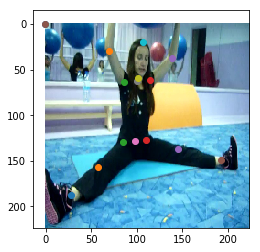

In [25]:
n=190
img = df['NAME'][n]
im = load_img('../MPII/'+img,target_size=(224,224))
points = y_train2[n]
i=0
plt.imshow(im)
while i < 16:
    x = points[2*i]
    y = points[(2*i)+1]
    plt.scatter([[x]],[[y]])
    i=i+1


In [34]:
#imag(10)
X=image_data2/255.

In [2]:
from keras.applications.resnet50 import ResNet50

Using TensorFlow backend.
/usr/local/lib/python2.7/dist-packages/requests/__init__.py:83: RequestsDependencyWarning: Old version of cryptography ([1, 2, 3]) may cause slowdown.
  warnings.warn(warning, RequestsDependencyWarning)


In [29]:
base_model=ResNet50(include_top=False,weights='imagenet',input_shape=(224,224,3))
for layer in base_model.layers[:-7]:
    layer.trainable=False

for layer in base_model.layers:
    print(layer,layer.trainable)
print(base_model.summary())

(<keras.engine.input_layer.InputLayer object at 0x7fd8eba3b190>, False)
(<keras.layers.convolutional.ZeroPadding2D object at 0x7fd9ed85cc90>, False)
(<keras.layers.convolutional.Conv2D object at 0x7fd8e2b27890>, False)
(<keras.layers.normalization.BatchNormalization object at 0x7fd8eba3b3d0>, False)
(<keras.layers.core.Activation object at 0x7fd8e2b6d950>, False)
(<keras.layers.convolutional.ZeroPadding2D object at 0x7fd8e2ad7b90>, False)
(<keras.layers.pooling.MaxPooling2D object at 0x7fd8e2ad7410>, False)
(<keras.layers.convolutional.Conv2D object at 0x7fd8e2ad7c50>, False)
(<keras.layers.normalization.BatchNormalization object at 0x7fd8e2a00b50>, False)
(<keras.layers.core.Activation object at 0x7fd8e2a00f90>, False)
(<keras.layers.convolutional.Conv2D object at 0x7fd8e2942e10>, False)
(<keras.layers.normalization.BatchNormalization object at 0x7fd8e2a31850>, False)
(<keras.layers.core.Activation object at 0x7fd8e29d3110>, False)
(<keras.layers.convolutional.Conv2D object at 0x7fd8e

In [30]:
model=Sequential()

model.add(base_model)
model.add(Flatten())
# model.add(Dense(1024,activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(512,activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(256,activation='relu'))
# model.add(Dropout(0.5))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32,activation='linear'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 7, 7, 2048)        23587712  
_________________________________________________________________
flatten_2 (Flatten)          (None, 100352)            0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               12845184  
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                4128      
Total params: 36,437,024
Trainable params: 16,264,864
Non-trainable params: 20,172,160
_________________________________________________________________


In [65]:
# model.add(Convolution2D(32,(4,4),activation='relu',input_shape=(224,224,3)))

# model.add(GlobalAveragePooling2D())
# model.add(Dropout(0.5))
# model.add(Convolution2D(64,(5,5),activation='relu'))
# model.add(GlobalAveragePooling2D())
# model.add(Dropout(0.5))
# model.add(Convolution2D(128,(5,5),activation='relu'))
# model.add(GlobalAveragePooling2D())
# model.add(Dropout(0.5))


In [31]:
checkpoint=ModelCheckpoint('./base.model',
                          monitor='val_loss',
                          verbose=1,
                          save_best_only=True,
                          mode='max',
                          save_weights_only=False,
                          period=1)
earlystop=EarlyStopping(monitor='val_loss',
                       min_delta=0.001,
                       patience=30,
                       verbose=1,
                       mode='auto')

tensorboard = TensorBoard(
    log_dir = './logs',
    histogram_freq=0,
    batch_size=16,
    write_graph=True,
    write_grads=True,
    write_images=False,
)

csvlogger = CSVLogger(
    filename= "training_csv.log",
    separator = ",",
    append = False
)

lrsched = LearningRateScheduler(step_decay,verbose=1)

reduce = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.8,
    patience=5,
    verbose=1, 
    mode='auto',
    min_delta=0.0001, 
    cooldown=1, 
    min_lr=0.0001
)

callbacks = [checkpoint,tensorboard,earlystop,csvlogger,reduce]

In [32]:
opt=SGD(lr=1e-5,momentum=0.95)

model.compile(loss='mean_absolute_error',
             optimizer=opt,metrics=['mean_absolute_error'])

In [ ]:
hist=model.fit(X,y_train2,epochs=10,shuffle=True,batch_size=256,validation_split=0.2,callbacks=callbacks)

Train on 2400 samples, validate on 600 samples


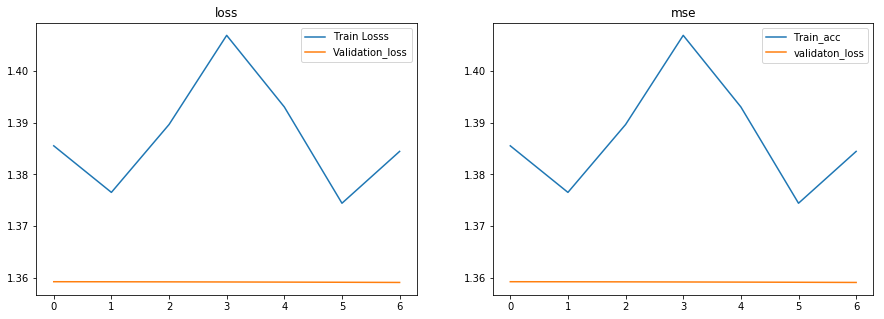

In [42]:
show_final_history(hist)                                                                                                       

In [62]:
history=model.fit(X,y_train2,steps_per_epoch=50,
                           validation_split=0.2,
                           validation_steps=50,
                           epochs=7,verbose=1,
                           callbacks=callbacks)

Train on 160 samples, validate on 40 samples
Epoch 1/7
50/50 [==============================] - 434s 9s/step - loss: 0.8673 - mean_absolute_error: 0.8673 - val_loss: 0.5165 - val_mean_absolute_error: 0.5165

Epoch 00001: val_loss improved from -inf to 0.51650, saving model to ./base.model
Epoch 2/7
50/50 [==============================] - 402s 8s/step - loss: 0.7924 - mean_absolute_error: 0.7924 - val_loss: 0.5057 - val_mean_absolute_error: 0.5057

Epoch 00002: val_loss did not improve from 0.51650
Epoch 3/7
50/50 [==============================] - 434s 9s/step - loss: 0.7487 - mean_absolute_error: 0.7487 - val_loss: 0.4999 - val_mean_absolute_error: 0.4999

Epoch 00003: val_loss did not improve from 0.51650
Epoch 4/7
50/50 [==============================] - 447s 9s/step - loss: 0.7097 - mean_absolute_error: 0.7097 - val_loss: 0.4963 - val_mean_absolute_error: 0.4963

Epoch 00004: val_loss did not improve from 0.51650
Epoch 5/7
50/50 [==============================] - 415s 8s/step - lo

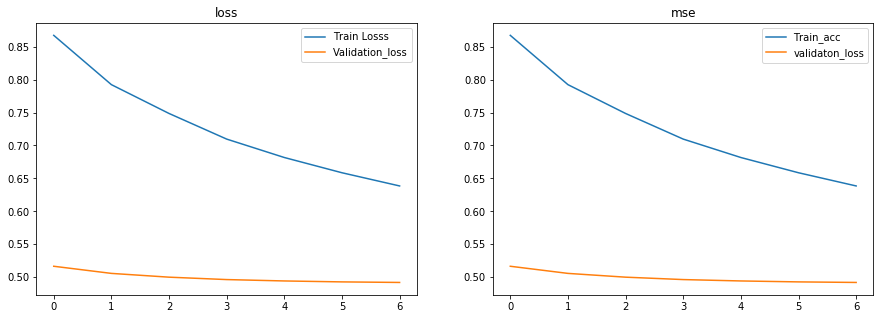

In [64]:
show_final_history(history) 

In [65]:
y_pred=model.predict(X[:10])


In [66]:
print(y_pred[0])
print(y_train2[0])

[-0.08374444  0.04730792 -0.14819144 -0.14496501 -0.05972911 -0.00113696
 -0.24216138 -0.20138156 -0.18758956 -0.08545614 -0.15967757 -0.1457886
  0.04696748 -0.04778884 -0.11845714  0.04369771  0.00101371 -0.42728204
 -0.06747732 -0.00987027 -0.065079   -0.04328571  0.19093648 -0.08397209
  0.27131268  0.02066635  0.06311774  0.09514416 -0.00975058  0.223296
  0.02652777  0.11708139]
[-0.515625   -0.45277777 -0.51875    -0.6263889  -0.5523437  -0.7430556
 -0.49453124 -0.73888886 -0.48359376 -0.69305557 -0.4875     -0.6791667
 -0.5234375  -0.74027777 -0.49453124 -0.75555557 -0.50232804 -0.7363635
 -0.45626572 -0.84974766 -0.5265625  -0.69861114 -0.5679687  -0.7763889
 -0.53046876 -0.76805556 -0.459375   -0.7430556  -0.45859376 -0.6666667
 -0.4625     -0.56527776]


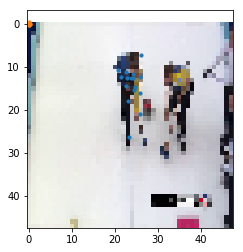

In [71]:
plt.imshow(X[0])
plt.scatter(y_train2[0][0::2]*48+48,y_train2[0][1::2]*48+48,s=10)
plt.scatter(y_pred[0][0::2],y_pred[0][1::2],s=10)

In [26]:
from keras.models import Sequential
from keras.layers import Input,Convolution2D,MaxPooling2D,Flatten,Dense,Dropout
from keras.utils import np_utils

import tensorflow

In [27]:
model1 = Sequential()
model1.add(Convolution2D(32,(3,3),activation='relu', input_shape=(48,48,3)))
model1.add(MaxPooling2D(2,2))
model1.add(Dropout(0.1))
model1.add(Convolution2D(64, (2,2), activation='relu'))
model1.add(MaxPooling2D(2,2))
model1.add(Dropout(0.25))
model1.add(Convolution2D(128,(2,2),activation='relu'))
model1.add(MaxPooling2D(2,2))
model1.add(Dropout(0.5))
model1.add(Flatten())
model1.add(Dense(500,activation='softmax'))
model1.add(Dense(500,activation='softmax'))
model1.add(Dense(32,activation='linear'))

model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 46, 46, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 64)        8256      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 11, 11, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 11, 11, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 128)       32896     
__________

In [28]:
model1.compile(loss='mean_absolute_error',optimizer='adam',metrics=['mean_absolute_error'])

hist1=model1.fit(X,y_train2,epochs=50,shuffle=True,batch_size=256,validation_split=0.2,callbacks=callbacks)

Train on 8000 samples, validate on 2000 samples
Epoch 1/50
8000/8000 [==============================] - 27s 3ms/step - loss: 0.5161 - mean_absolute_error: 0.5161 - val_loss: 0.4733 - val_mean_absolute_error: 0.4733

Epoch 00001: val_loss improved from -inf to 0.47330, saving model to ./base.model
Epoch 2/50
8000/8000 [==============================] - 26s 3ms/step - loss: 0.4538 - mean_absolute_error: 0.4538 - val_loss: 0.4130 - val_mean_absolute_error: 0.4130

Epoch 00002: val_loss did not improve from 0.47330
Epoch 3/50
8000/8000 [==============================] - 29s 4ms/step - loss: 0.3940 - mean_absolute_error: 0.3940 - val_loss: 0.3571 - val_mean_absolute_error: 0.3571

Epoch 00003: val_loss did not improve from 0.47330
Epoch 4/50
8000/8000 [==============================] - 28s 3ms/step - loss: 0.3387 - mean_absolute_error: 0.3387 - val_loss: 0.3076 - val_mean_absolute_error: 0.3076

Epoch 00004: val_loss did not improve from 0.47330
Epoch 5/50
8000/8000 [=======================

8000/8000 [==============================] - 26s 3ms/step - loss: 0.1592 - mean_absolute_error: 0.1592 - val_loss: 0.1709 - val_mean_absolute_error: 0.1709

Epoch 00037: val_loss did not improve from 0.47330

Epoch 00037: ReduceLROnPlateau reducing learning rate to 0.00040960004553198815.
Epoch 38/50
8000/8000 [==============================] - 27s 3ms/step - loss: 0.1592 - mean_absolute_error: 0.1592 - val_loss: 0.1710 - val_mean_absolute_error: 0.1710

Epoch 00038: val_loss did not improve from 0.47330
Epoch 39/50
8000/8000 [==============================] - 26s 3ms/step - loss: 0.1592 - mean_absolute_error: 0.1592 - val_loss: 0.1709 - val_mean_absolute_error: 0.1709

Epoch 00039: val_loss did not improve from 0.47330
Epoch 40/50
8000/8000 [==============================] - 26s 3ms/step - loss: 0.1592 - mean_absolute_error: 0.1592 - val_loss: 0.1709 - val_mean_absolute_error: 0.1709

Epoch 00040: val_loss did not improve from 0.47330
Epoch 41/50
8000/8000 [===========================

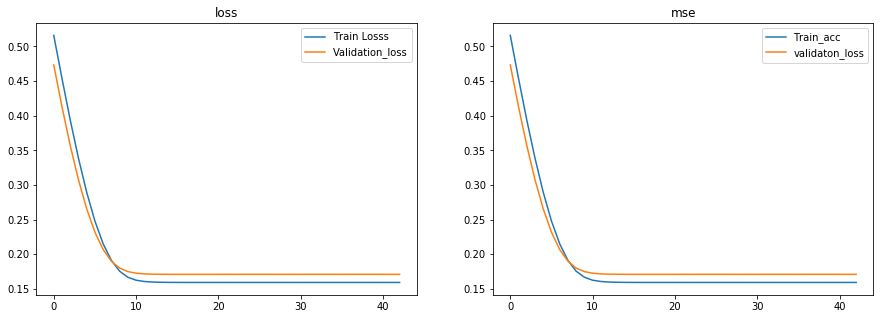

In [30]:
show_final_history(hist1)

In [33]:
y_pred=model1.predict(X[:10])

In [37]:
y_train2[0]

array([-0.515625  , -0.45277777, -0.51875   , -0.6263889 , -0.5523437 ,
       -0.7430556 , -0.49453124, -0.73888886, -0.48359376, -0.69305557,
       -0.4875    , -0.6791667 , -0.5234375 , -0.74027777, -0.49453124,
       -0.75555557, -0.50232804, -0.7363635 , -0.45626572, -0.84974766,
       -0.5265625 , -0.69861114, -0.5679687 , -0.7763889 , -0.53046876,
       -0.76805556, -0.459375  , -0.7430556 , -0.45859376, -0.6666667 ,
       -0.4625    , -0.56527776], dtype=float32)

In [36]:
y_pred[0]

array([-0.659154  , -0.34682885, -0.5911691 , -0.37221885, -0.5459085 ,
       -0.42939147, -0.50081   , -0.42848346, -0.546587  , -0.37196857,
       -0.6363921 , -0.34510857, -0.5234307 , -0.42990324, -0.51753926,
       -0.64261043, -0.5176599 , -0.6742822 , -0.5188664 , -0.8125866 ,
       -0.5570531 , -0.48716623, -0.5690938 , -0.52651143, -0.55707955,
       -0.6427675 , -0.4864606 , -0.6445044 , -0.47527105, -0.52508914,
       -0.4851787 , -0.4846713 ], dtype=float32)

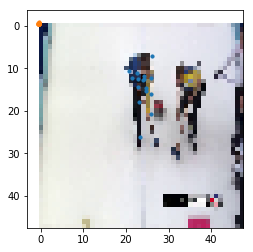

In [38]:
plt.imshow(X[0])
plt.scatter(y_train2[0][0::2]*48+48,y_train2[0][1::2]*48+48,s=10)
plt.scatter(y_pred[0][0::2],y_pred[0][1::2],s=10)